<a href="https://colab.research.google.com/github/Aprilianiput21/TA_Model-ETp/blob/main/RF_Nawungan_Rs_%26_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESTIMASI ETP DENGAN ALGORITMA RANDOM FOREST**

Data AWS Nawungan
Data Masukan : Suhu dan Radiasi Matahari

In [1]:
#Import Library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn. metrics import mean_squared_error, r2_score

In [2]:
#Reading Dataset dalam format data Excel
df = pd.read_excel('/content/Nawungan_15 Minutes_PM.xlsx')
df = df.drop(0)
df = df.drop(1)
df.head()

,Date,Year,DOY,Time,T,RH,U,Rs,Dec,dr,...,ρ Cp,ra,G,rc,LE,LE.1,ET,Unnamed: 28,Unnamed: 29,Unnamed: 30
2,2019-03-23 13:45:00,2019,82,13.75,35.33,98.1,0.6,495.300293,0.012626,1.005232,...,1253.501011,322.091168,38.924002,69,288.429159,1.038345,0.423814,h,0.120000,m
3,2019-03-23 14:00:00,2019,82,14,35.2,98.07,0.6,476.44043,0.012626,1.005232,...,1252.053277,322.091168,37.458473,69,277.162717,0.997786,0.40726,rc day,69.000000,s/m
4,2019-03-23 14:15:00,2019,82,14.25,35.56,98.1,0.8,564.51416,0.012626,1.005232,...,1251.928438,241.568376,44.276054,69,325.377537,1.171359,0.478106,rc night,690.000000,s/m
5,2019-03-23 14:30:00,2019,82,14.5,34.94,98.1,0.9,493.835449,0.012626,1.005232,...,1249.215979,214.727445,38.773533,69,281.796996,1.014469,0.414069,Latitude,-7.964911,degrees
6,2019-03-23 14:45:00,2019,82,14.75,34.51,98.08,0.5,322.08252,0.012626,1.005232,...,1247.027952,386.509401,25.507475,69,188.38674,0.678192,0.276813,Longitude,110.405090,degrees


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91689 entries, 2 to 91690
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         91689 non-null  object 
 1   Year         91689 non-null  object 
 2   DOY          91689 non-null  object 
 3   Time         91689 non-null  object 
 4   T            91689 non-null  object 
 5   RH           91689 non-null  object 
 6   U            91689 non-null  object 
 7   Rs           91689 non-null  object 
 8   Dec          91689 non-null  object 
 9   dr           91689 non-null  object 
 10  t.c.         91689 non-null  object 
 11  angh         91689 non-null  object 
 12  cos θ        91689 non-null  object 
 13  Rs pot       91689 non-null  object 
 14  TRA          91689 non-null  float64
 15  Rb           91689 non-null  object 
 16  es           91689 non-null  object 
 17  e            91689 non-null  object 
 18  VPD          91689 non-null  object 
 19  Rn  

In [4]:
#Mengubah Tipe data menjadi Float
df[['Rs', 'RH', 'U', 'T', 'ET']] = df[['Rs', 'RH', 'U', 'T', 'ET']].astype(float)

In [5]:
df[['Rs', 'RH', 'U', 'T', 'ET']].describe()

,Rs,RH,U,T,ET
count,91689.000000,91689.00000,91689.000000,91689.000000,91689.000000
mean,197.252505,98.43691,0.467068,27.385514,0.186459
std,283.117804,0.18290,0.377165,5.168815,0.266269
min,0.000000,97.71000,0.100000,17.690000,-0.010124
25%,0.000000,98.31000,0.200000,23.450000,0.000018
50%,1.647949,98.44000,0.300000,25.020000,0.008768
75%,371.520996,98.57000,0.700000,31.740000,0.350675
max,1114.196777,99.06000,3.300000,42.130000,1.035958


In [6]:
#Input features dan target variable
features_variable = df['Rs' and 'T']
target_variable = df['ET']

X = features_variable #independent variabel
y = target_variable #dependent variabel


In [7]:
#Split dataset untuk training dan testing dataset dengan perbandingan 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Jumlah data untuk training dan testing
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(64182,) (27507,) (64182,) (27507,)


In [8]:
#Random Forest Model
model = RandomForestRegressor(n_estimators = 150)

In [9]:
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)
#Fitting model
rf = model.fit(X_train_reshaped, y_train)

In [10]:
#Prediction on Training Dataset
ytrain_pred = rf.predict(X_train_reshaped)

#Nilai R Squared pada Data Training
print('Nilai R_Squared (Training): %.2f'% r2_score(y_train, ytrain_pred))
#Nilai MSE pada Data Training
print('Nilai MSE (Training): %.2f'% mean_squared_error(y_train, ytrain_pred))
#Nilai RMSE pada Data Training
print('The RMSE (Training): %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

Nilai R_Squared (Training): 0.83
Nilai MSE (Training): 0.01
The RMSE (Training): 0.11


In [11]:
#Prediction on Testing Dataset
ytest_pred =rf.predict(X_test_reshaped)

#Nilai R Squared pada Data Testing
print('Nilai R_Squared (Testing): %.2f'% r2_score(y_test, ytest_pred))
#Nilai MSE pada Data Testing
print('Nilai MSE (Testing): %.2f'% mean_squared_error(y_test, ytest_pred))
#Nilai RMSE pada Data Testing
print('Nilai RMSE (Testing): %.2f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))


Nilai R_Squared (Testing): 0.81
Nilai MSE (Testing): 0.01
Nilai RMSE (Testing): 0.12


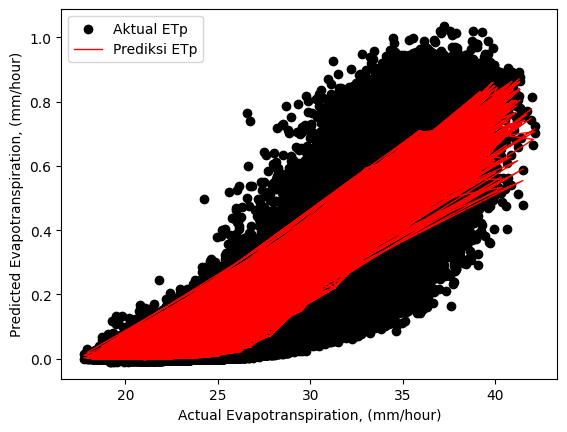

In [12]:
import matplotlib.pyplot as plt
# Plot pada data pelatihan
plt.scatter(X_train_reshaped, y_train, color='black', label='Aktual ETp')
plt.plot(X_train_reshaped, ytrain_pred, color='red', label='Prediksi ETp', linewidth=1)
plt.xlabel('Actual Evapotranspiration, (mm/hour)')
plt.ylabel('Predicted Evapotranspiration, (mm/hour)')
plt.legend()
plt.show()

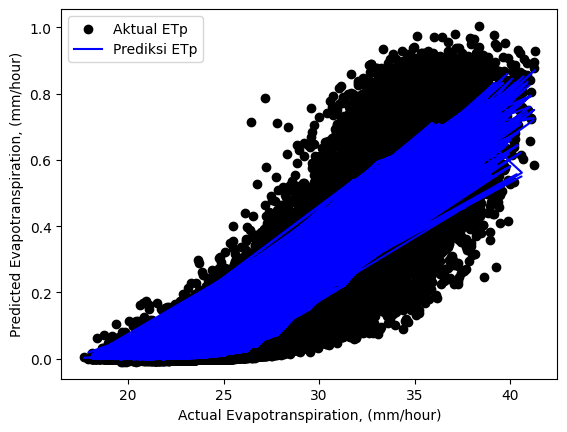

In [13]:
#Plot pada data test
plt.scatter(X_test_reshaped, y_test, color = 'black', label = 'Aktual ETp')
plt.plot(X_test_reshaped, ytest_pred, color='blue', label='Prediksi ETp')
plt.xlabel('Actual Evapotranspiration, (mm/hour)')
plt.ylabel('Predicted Evapotranspiration, (mm/hour)')
plt.legend()
plt.show()

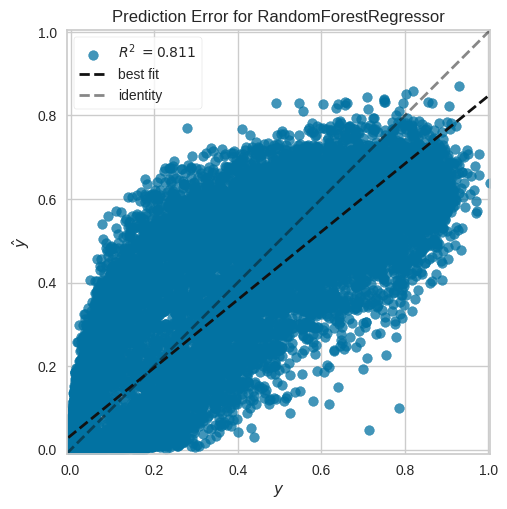

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [14]:
#Plotting Prediction Error
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rf)
visualizer.fit(X_train_reshaped, y_train)
visualizer.score(X_test_reshaped, y_test)
visualizer.poof()

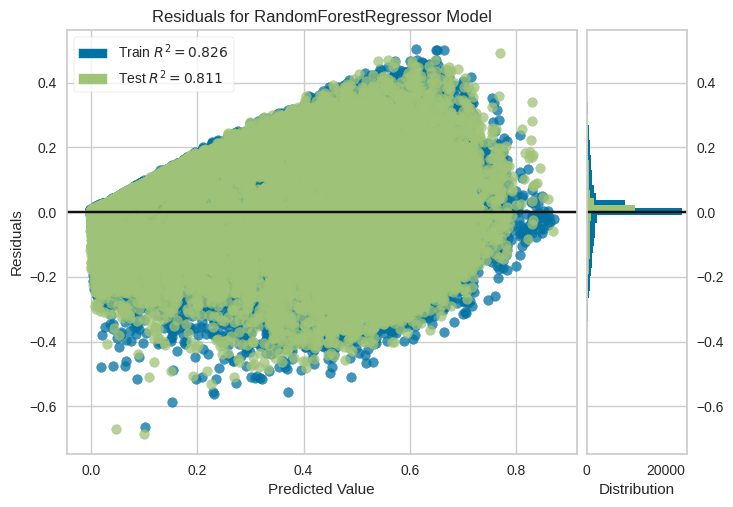

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
#Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rf)
visualizer.fit(X_train_reshaped, y_train)
visualizer.score(X_test_reshaped, y_test)
visualizer.poof()

In [16]:
# K Fold Cross Validation
from sklearn.model_selection import cross_val_score
#Training Model CV
score_train = cross_val_score(rf, X_train_reshaped, y_train, scoring ='neg_mean_squared_error', cv = 10)
print(score_train)
#The mean score
print('Mean CV (Train):', np.mean(score_train))

[-0.01354799 -0.01385678 -0.01409807 -0.01321495 -0.01344427 -0.0133537
 -0.01384471 -0.01365675 -0.01357958 -0.01369534]
Mean CV (Train): -0.013629214327333456


In [17]:
#Testing Model CV
score_test = cross_val_score(rf, X_test_reshaped, y_test, scoring ='neg_mean_squared_error', cv = 10)
print(score_test)
#The mean score test
print('Mean CV (Test)', np.mean(score_test))

[-0.01386114 -0.01387952 -0.01524013 -0.01563467 -0.01555213 -0.0136997
 -0.01461213 -0.01435923 -0.01450156 -0.01511139]
Mean CV (Test) -0.014645159208810413
